# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

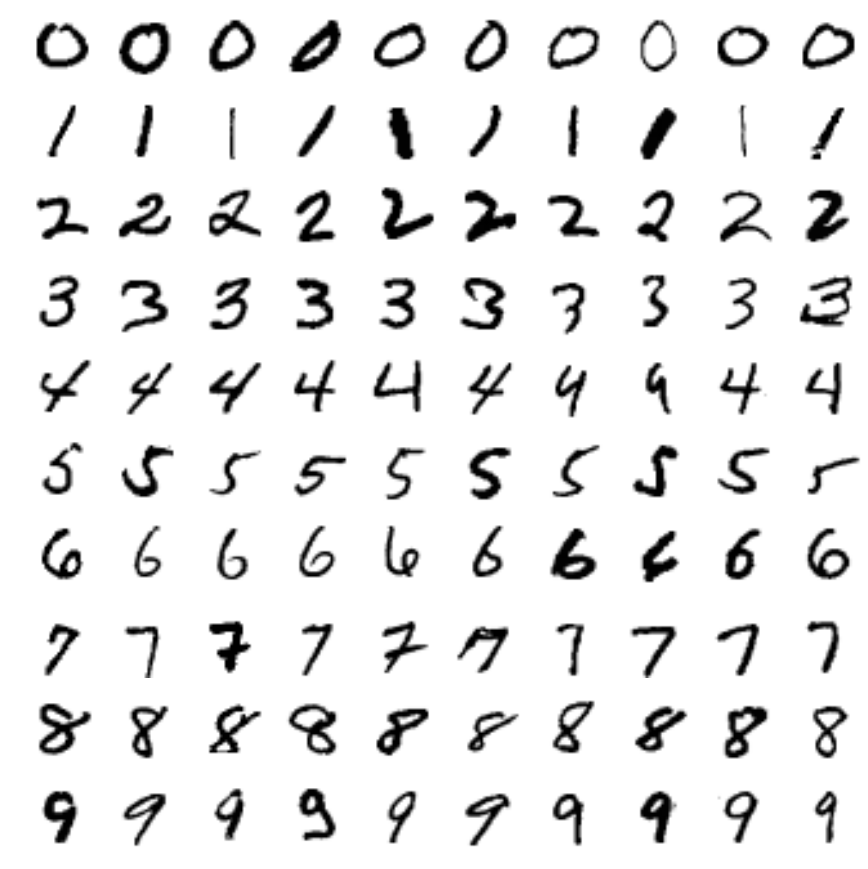

In [3]:
plt.figure(figsize = (15,15))
plt.set_cmap('gray_r')

def P1(num_examples=10):
    for digit in range(0, 10):
        examples = X[np.where(Y == digit)[0][:num_examples]]
        for index, image in enumerate(examples):
            plt.subplot(10, num_examples, digit * num_examples + index + 1)
            plt.imshow(image.reshape(28,28))
            plt.axis('off')
        
P1(10)


(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [6]:
def P2(k_values):
    for knn in k_values:
        clf = KNeighborsClassifier(n_neighbors=knn, n_jobs=-1)
        clf.fit(mini_train_data, mini_train_labels)
        if knn == 1:
            pred_labels = clf.predict(dev_data)
            score = np.mean(pred_labels == dev_labels)
            print 'Using %d nearest neighbors results in accuracy of %.3f' %(knn, score)
            print classification_report(dev_labels, pred_labels, digits=3)
        else:
            print 'Using %d nearest neighbors results in accuracy of %.3f' %(knn, clf.score(dev_data, dev_labels))

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Using 1 nearest neighbors results in accuracy of 0.888
             precision    recall  f1-score   support

        0.0      0.907     0.980     0.942        99
        1.0      0.890     1.000     0.942       105
        2.0      0.988     0.794     0.880       102
        3.0      0.773     0.872     0.820        86
        4.0      0.885     0.817     0.850       104
        5.0      0.927     0.835     0.879        91
        6.0      0.940     0.959     0.949        98
        7.0      0.889     0.920     0.904       113
        8.0      0.944     0.875     0.908        96
        9.0      0.777     0.821     0.798       106

avg / total      0.892     0.888     0.888      1000

Using 3 nearest neighbors results in accuracy of 0.878
Using 5 nearest neighbors results in accuracy of 0.869
Using 7 nearest neighbors results in accuracy of 0.865
Using 9 nearest neighbors results in accuracy of 0.863


ANSWER: The most difficult digit to classify seems to be 9, with both poor precision and poor recall

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [8]:
def P3(train_sizes, accuracies):
    clf = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
    
    for sizes in train_sizes:
        starttime = time.time()
        clf = clf.fit(train_data[:sizes], train_labels[:sizes])
        accuracy = clf.score(dev_data, dev_labels)
        print 'Fitting training set of %d completed after %.2f seconds: %.4f accuracy' %(sizes, time.time() - starttime, accuracy)
        accuracies.append(accuracy)
    
    return accuracies

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
accuracies = P3(train_sizes, accuracies)

Fitting training set of 100 completed after 0.14 seconds: 0.7200 accuracy
Fitting training set of 200 completed after 0.13 seconds: 0.7860 accuracy
Fitting training set of 400 completed after 0.24 seconds: 0.8410 accuracy
Fitting training set of 800 completed after 0.47 seconds: 0.8840 accuracy
Fitting training set of 1600 completed after 0.93 seconds: 0.9020 accuracy
Fitting training set of 3200 completed after 1.75 seconds: 0.9260 accuracy
Fitting training set of 6400 completed after 3.64 seconds: 0.9370 accuracy
Fitting training set of 12800 completed after 7.95 seconds: 0.9590 accuracy
Fitting training set of 25000 completed after 18.68 seconds: 0.9700 accuracy


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [9]:
def P4():
    l_model = LinearRegression().fit(np.array(train_sizes).reshape(9,1), np.array(accuracies))
    print 'Linear model predicts an accuracy of %.3f with training size of %d' %(l_model.predict(60000),60000)

    accuracy_logit = np.log(accuracies / (1 - np.array(accuracies)))
    log_training_size = np.log(train_sizes).reshape(9,1)

    l_model = LinearRegression().fit(log_training_size, accuracy_logit)
    prediction_logit = l_model.predict(np.log(60000))
    prediction_accuracy = 1 / (1 + np.exp(-prediction_logit))
    
    print 'Logistic model predicts an accuracy logit of %.2f, or %.3f accuracy, with training size of %d' %(prediction_logit,prediction_accuracy,60000)

P4()

Linear model predicts an accuracy of 1.243 with training size of 60000
Logistic model predicts an accuracy logit of 3.82, or 0.979 accuracy, with training size of 60000


ANSWER: The problem with the linear model is that it is not bounded by [0, 1] and predicts 124% accuracy. To transform the accuracy, we can take the logit, which is no longer bounded by [0, 1]. I also took the log of the training size because the relationship was still non-linear.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
The most confused pairs of digits are (3,5) and (4,9)


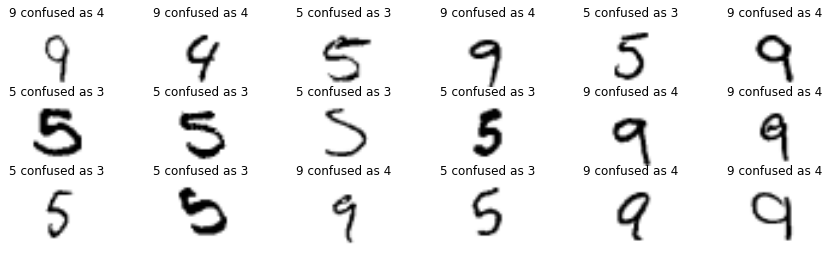

In [16]:
def P5():
    clf = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
    clf.fit(mini_train_data, mini_train_labels)
    pred_labels = clf.predict(dev_data)
    print confusion_matrix(dev_labels, pred_labels)
    print 'The most confused pairs of digits are (3,5) and (4,9)'
    
    plt.figure(figsize = (15,4))
    plt.set_cmap('gray_r')

    subplot_index = 0

    for index, pair in enumerate(zip(pred_labels, dev_labels)):
        if pair in [(3,5), (4,9)]:
            subplot_index += 1
            image = dev_data[index]
            plt.subplot(3, 6, subplot_index)
            plt.imshow(image.reshape(28,28))
            plt.axis('off')
            title = '%d confused as %d' %(pair[1], pair[0])
            plt.title(title)
    
P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [17]:
def gaussian_distance(center, pixel, sigma):
    x_dist = (pixel[0] - center[0]) ** 2
    y_dist = (pixel[1] - center[1]) ** 2
    
    return np.exp(-(x_dist + y_dist) / (2 * sigma ** 2)) / (2 * 3.14 * sigma ** 2)

def gaussian_blur(matrix, sigma):
    rows, cols = matrix.shape    
    blurred_matrix = np.zeros((rows, cols))

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            imin = i - 1 if i - 1 >= 0 else 0
            imax = i + 1 if i + 1 < rows else i

            jmin = j - 1 if j - 1 >= 0 else 0
            jmax = j + 1 if j + 1 < cols else j

            neighbors = [matrix[x,y] for x in range(imin, imax + 1) for y in xrange(jmin, jmax + 1)]
            weights = [gaussian_distance((i,j), (x,y), sigma) for x in range(imin, imax + 1) for y in xrange(jmin, jmax + 1)]
            weights /= sum(weights)

            blurred_matrix[i,j] = sum(neighbors * weights)
            
    return blurred_matrix

def blur_dataset(matrix):
    blurred_dataset = np.zeros(matrix.shape)
    
    for index, digit in enumerate(matrix):
        blurred_digit = gaussian_blur(digit.reshape(28,28), 1.5)
        blurred_digit = blurred_digit.reshape(784)
        blurred_dataset[index] = blurred_digit
        
    return blurred_dataset

train_data_blurred = blur_dataset(mini_train_data)
dev_data_blurred = blur_dataset(dev_data)

In [19]:
def P6():
    clf = KNeighborsClassifier(n_neighbors=1)
    
    clf.fit(train_data_blurred, mini_train_labels)
    print 'Blurring training data results in accuracy of %.3f' %(clf.score(dev_data, dev_labels))
    
    clf.fit(mini_train_data, mini_train_labels)
    print 'Blurring dev data results in accuracy of %.3f' %(clf.score(dev_data_blurred, dev_labels))
    
    clf.fit(train_data_blurred, mini_train_labels)
    print 'Blurring training and dev data results in accuracy of %.3f' %(clf.score(dev_data_blurred, dev_labels))
    
P6()

Blurring training data results in accuracy of 0.910
Blurring dev data results in accuracy of 0.873
Blurring training and dev data results in accuracy of 0.901


ANSWER: Applying Gaussian blur to only the training data produced the best results. Blurring the dev data seems to make it harder to distinguish the digits and reduces accuracy.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [22]:
def P7():
    clf = BernoulliNB(alpha = 1, binarize = 0.5)
    clf.fit(train_data_blurred, mini_train_labels)
    print 'Bernoulli Naive Bayes accuracy: %.3f' %(clf.score(dev_data, dev_labels))
    
    clf = MultinomialNB(alpha = 1)
    bins = np.array([0, 1./3, 2./3, 1])

    train_data_blurred_multi = np.digitize(train_data_blurred, bins) - 1
    dev_data_multi = np.digitize(dev_data, bins) - 1
    
    clf.fit(train_data_blurred_multi, mini_train_labels)
    print 'Multinomial Naive Bayes accuracy: %.3f' %(clf.score(dev_data_multi, dev_labels))
    
P7()

Bernoulli Naive Bayes accuracy: 0.820
Multinomial Naive Bayes accuracy: 0.800


ANSWER: The multi-class version of NB did not improve the accuracy of the model. This suggests to be that most of the information contained in each pixel is captured in a binary format (on vs off) and that adding an intermediate state (gray) does not add meaningful information.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [25]:
def P8(alphas):
    clf = BernoulliNB(binarize = 0.5)

    search = GridSearchCV(clf, alphas)
    return search.fit(train_data_blurred, mini_train_labels)

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

print nb.best_params_

for params, mean_score, scores in nb.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r" %(mean_score, scores.std() * 2, params))



{'alpha': 0.0001}
0.092 (+/-0.002) for {'alpha': 0.0}
0.804 (+/-0.037) for {'alpha': 0.0001}
0.803 (+/-0.033) for {'alpha': 0.001}
0.804 (+/-0.031) for {'alpha': 0.01}
0.799 (+/-0.027) for {'alpha': 0.1}
0.792 (+/-0.018) for {'alpha': 0.5}
0.788 (+/-0.016) for {'alpha': 1.0}
0.777 (+/-0.023) for {'alpha': 2.0}
0.714 (+/-0.029) for {'alpha': 10.0}


ANSWER: The best value for alpha is 0.0001. The accuracy when alpha is set to 0, accuracy drops significantly to under 10%. This is expected because except for any pixel that are always 1 or always 0 for a digit, any instance where the inverse is true will set the probability of that class to 0.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [29]:
def P9():
    clf = GaussianNB()
    gnb = clf.fit(mini_train_data, mini_train_labels)

    print 'Gaussian Naive Bayes accuracy: %.3f' %(clf.score(dev_data, dev_labels))
    
    return gnb
    
gnb = P9()

Gaussian Naive Bayes accuracy: 0.621


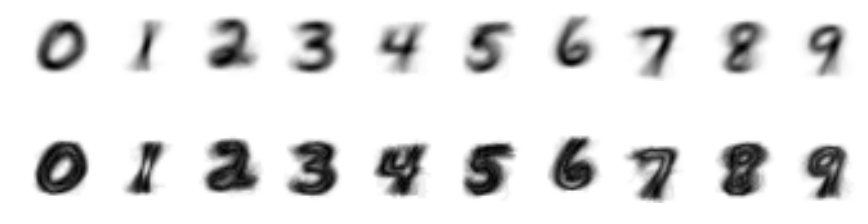

In [30]:
plt.figure(figsize=(15,4))
plt.set_cmap('gray_r')

for index, digit in enumerate(gnb.theta_):
    plt.subplot(2, 10, index + 1)
    plt.imshow(digit.reshape(28,28))
    plt.axis('off')
    
for index, digit in enumerate(gnb.sigma_):
    plt.subplot(2, 10, index + 11)
    plt.imshow(digit.reshape(28,28))
    plt.axis('off')



In [40]:
def P9():
    clf = GaussianNB()
    gnb = clf.fit(mini_train_data, mini_train_labels)
    gnb.sigma_ = np.zeros(gnb.sigma_.shape) + 0.01
    print 'Gaussian Naive Bayes accuracy: %.3f' %(clf.score(dev_data, dev_labels))
    
    return gnb
    
gnb = P9()

Gaussian Naive Bayes accuracy: 0.802


ANSWER: The issue encountered by the Gaussian NB classifier is that it is overfitting the data. There is a high amount of variance in the area surrounding the digits that they can have a outsized effect on determining the identity of the digit. By setting the variance to be uniform, this refocuses the classifier on the areas where theta is high.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

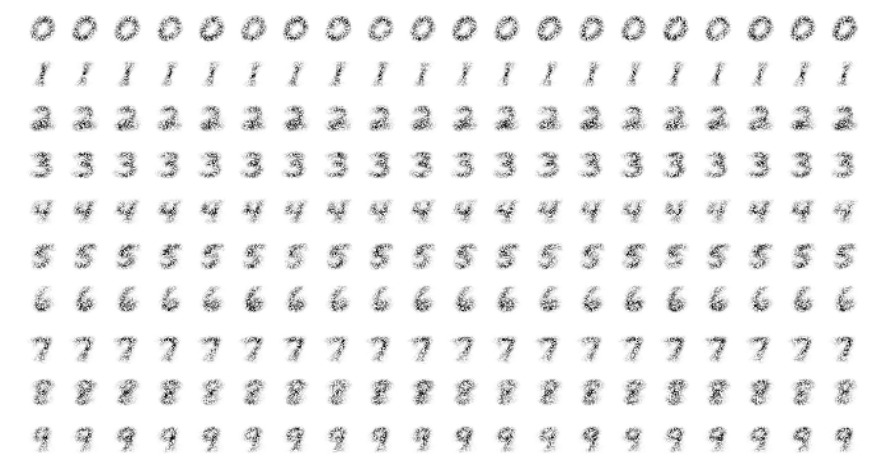

In [34]:
def P10(num_examples):

    clf = BernoulliNB(alpha = 0.0001, binarize = 0.5)
    bnb = clf.fit(train_data_blurred, mini_train_labels)

    pixel_odds = np.exp(bnb.feature_log_prob_)
    unifdist = np.random.rand(10, num_examples, 784)

    plt.figure(figsize=(15,8))
    plt.set_cmap('gray_r')

    for digit in range(10):
        for index, image in enumerate(unifdist[digit] * pixel_odds[digit]):
            plt.subplot(10, num_examples, index + digit * num_examples + 1)
            plt.imshow(image.reshape(28,28))
            plt.axis('off')


P10(20)

ANSWER: The generated digits, in general, look much more uniform than the training digits. Rather than differing from each other on a macro level (i.e. where stroke are drawn), they differ on a micro level (whether one pixel is on or off), resulting in a swiss cheese like look.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [36]:
def P11(buckets, correct, total):
    clf = BernoulliNB(alpha = 0.001, binarize = 0.5)
    clf.fit(train_data_blurred, mini_train_labels)
    
    probs = clf.predict_proba(dev_data) 
    probs_binned = np.digitize(probs, buckets, right=True)
    
    for bin in range(len(buckets)):
        for digit in range(probs_binned.shape[1]):
            prediction = probs_binned[:,digit]
            index = np.where(prediction == bin)
            actual_digit = dev_labels[index]
            
            total[bin] += len(actual_digit)
            correct[bin] += np.sum(actual_digit == digit)
            
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] * 1.0 / total[i]
    print 'p(pred) <= %.13f    total = %4d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total = 9001    accuracy = 0.020
p(pred) <= 0.9000000000000    total =   25    accuracy = 0.480
p(pred) <= 0.9990000000000    total =   78    accuracy = 0.449
p(pred) <= 0.9999900000000    total =   76    accuracy = 0.434
p(pred) <= 0.9999999000000    total =   61    accuracy = 0.607
p(pred) <= 0.9999999990000    total =   53    accuracy = 0.774
p(pred) <= 0.9999999999900    total =   62    accuracy = 0.871
p(pred) <= 0.9999999999999    total =   63    accuracy = 0.889
p(pred) <= 1.0000000000000    total =  581    accuracy = 0.945


ANSWER: For each posterior bin, the accuracy of the classifer increases, so I would characterize this as a weakly calibrated classifier.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [38]:
def sum_matrix_axes(matrix):
    matrix = matrix.reshape(28,28)
    matrix = np.concatenate((matrix.reshape(784), 
                             np.sum(matrix, axis=1), # sum verticals
                             np.sum(matrix, axis=0)), # sum horizontal
                            axis = 0)
    return matrix


def P12():
    p12_train = np.array([sum_matrix_axes(matrix) for matrix in train_data_blurred])
    p12_dev = np.array([sum_matrix_axes(matrix) for matrix in dev_data])

    clf = BernoulliNB(alpha = 0.001, binarize = 0.5)
    clf.fit(p12_train, mini_train_labels)
    
    print clf.score(p12_dev, dev_labels)

P12()

0.811
